In [1]:
print("PRAISE THE LORD ALMIGHTY FATHER Thank You JESUS Praise You JESUS Forever May the HOLY SPIRIT Guide Us MOTHER MARY PRAY For Us SAINT JOSEPH, PRAY For Us SAINT ANTHONY PRAY For Us GOD BLESS !!! 🧡⛪✝⛪🧡")

PRAISE THE LORD ALMIGHTY FATHER Thank You JESUS Praise You JESUS Forever May the HOLY SPIRIT Guide Us MOTHER MARY PRAY For Us SAINT JOSEPH, PRAY For Us SAINT ANTHONY PRAY For Us GOD BLESS !!! 🧡⛪✝⛪🧡


In [2]:
import pandas as pd

### This would analyse all the features and Produce - RNN not using WeimanBull

In [3]:
df_matches = pd.read_csv('2022_to_2023_all_matches_preprocessed_v1.csv')


In [4]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 67 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0.1                               19110 non-null  int64  
 1   Unnamed: 0                                 19110 non-null  int64  
 2   year                                       19110 non-null  object 
 3   over_start_bowler_balls_bowled             19110 non-null  int64  
 4   over_start_bowler_wickets_taken            19110 non-null  int64  
 5   over_start_bowler_runs_given               19110 non-null  int64  
 6   over_start_batsman_on_strike_fours         19110 non-null  int64  
 7   over_start_batsman_on_strike_sixers        19110 non-null  int64  
 8   over_start_batsman_off_strike_balls_faced  19110 non-null  int64  
 9   over_start_batsman_on_strike_balls_faced   19110 non-null  int64  
 10  over_start_batsman_off

### Create A Method to Analyse the Time To Event and Uncencored


In [5]:
df_matches = df_matches[['date','over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings','target', 'req_run_rate',
       'over_start_run_rate', 'over_start_total_score',
       'over_start_total_wickets_fallen', 'over','wickets_fallen', 'sixers', 'fours', 'total_runs','bat_on_str_Ave', 'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50',
       'bat_on_str_0', 'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat',
       'bat_on_str_Inns', 'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS',
       'bat_on_str_BF', 'bowler_Mat', 'bowler_Inns', 'bowler_Overs',
       'bowler_Mdns', 'bowler_Runs', 'bowler_Wkts', 'bowler_Ave',
       'bowler_Econ', 'bowler_SR', 'bowler_4w', 'bowler_5w', 'bat_off_str_Ave',
       'bat_off_str_SR', 'bat_off_str_100','bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s', 'bat_off_str_6s',
       'bat_off_str_Mat', 'bat_off_str_Inns', 'bat_off_str_NO',
       'bat_off_str_Runs', 'bat_off_str_HS', 'bat_off_str_BF','y_is_wicket_fallen', 'match_num',]]

df_matches

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,...,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num
0,2015-11-26,0,0,0,0,0,0,0,0,0,...,114.000000,35.000000,35.000000,35.000000,5.000000,1092.000000,116.000000,797.0000,0,468
1,2015-11-26,0,0,0,0,0,3,3,1,4,...,114.000000,35.000000,35.000000,35.000000,5.000000,1092.000000,116.000000,797.0000,1,468
2,2015-11-26,6,0,5,1,0,0,6,0,6,...,69.178322,28.380821,36.585675,32.818811,5.740116,771.773217,69.867867,589.3779,1,468
3,2015-11-26,7,1,11,0,0,3,0,0,0,...,14.000000,4.000000,8.000000,8.000000,1.000000,129.000000,72.000000,101.0000,1,468
4,2015-11-26,12,1,7,0,0,1,2,0,0,...,105.000000,51.000000,52.000000,51.000000,10.000000,1225.000000,85.000000,914.0000,0,468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,6,0,19,5,0,19,36,20,46,...,10.000000,2.000000,2.000000,2.000000,0.000000,104.000000,63.000000,78.0000,1,665
19106,2018-04-03,12,1,15,0,0,20,1,21,1,...,10.000000,2.000000,2.000000,2.000000,0.000000,104.000000,63.000000,78.0000,0,665
19107,2018-04-03,12,1,26,2,0,6,21,2,22,...,1.000000,1.000000,2.000000,2.000000,0.000000,15.000000,14.000000,10.0000,0,665
19108,2018-04-03,18,1,21,1,0,24,11,26,8,...,10.000000,2.000000,2.000000,2.000000,0.000000,104.000000,63.000000,78.0000,0,665


In [6]:
df_matches['date'] = pd.to_datetime(df_matches['date'])
df_matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 60 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   date                                       19110 non-null  datetime64[ns]
 1   over_start_bowler_balls_bowled             19110 non-null  int64         
 2   over_start_bowler_wickets_taken            19110 non-null  int64         
 3   over_start_bowler_runs_given               19110 non-null  int64         
 4   over_start_batsman_on_strike_fours         19110 non-null  int64         
 5   over_start_batsman_on_strike_sixers        19110 non-null  int64         
 6   over_start_batsman_off_strike_balls_faced  19110 non-null  int64         
 7   over_start_batsman_on_strike_balls_faced   19110 non-null  int64         
 8   over_start_batsman_offstrike_runs          19110 non-null  int64         
 9   over_start_batsma

In [7]:
# Filter the DataFrame for values greater than a specific date
specific_date = pd.to_datetime('2017-01-01')
df_matches = df_matches[df_matches['date'] > specific_date]

In [8]:
df_final = df_matches[['date','over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'target', 'req_run_rate','over_start_run_rate',
       'over_start_total_score','over_start_total_wickets_fallen', 'over','wickets_fallen', 'sixers', 'fours', 'total_runs','bat_on_str_Ave',
       'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0',
       'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns',
       'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF',
       'bowler_Mat', 'bowler_Inns', 'bowler_Overs', 'bowler_Mdns',
       'bowler_Runs', 'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR',
       'bowler_4w', 'bowler_5w', 'bat_off_str_Ave', 'bat_off_str_SR',
       'bat_off_str_100', 'bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s',
       'bat_off_str_6s', 'bat_off_str_Mat', 'bat_off_str_Inns',
       'bat_off_str_NO', 'bat_off_str_Runs', 'bat_off_str_HS',
       'bat_off_str_BF','y_is_wicket_fallen','match_num']]

In [9]:
cols_to_scale = ['over_start_bowler_balls_bowled', 'over_start_bowler_wickets_taken',
       'over_start_bowler_runs_given', 'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'over_start_run_rate', 'target', 'req_run_rate', 'over_start_total_score',
       'over_start_total_wickets_fallen', 'over','wickets_fallen', 'sixers', 'fours','bat_on_str_Ave',
       'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0',
       'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns',
       'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF',
       'bowler_Mat', 'bowler_Inns', 'bowler_Overs', 'bowler_Mdns',
       'bowler_Runs', 'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR',
       'bowler_4w', 'bowler_5w', 'bat_off_str_Ave', 'bat_off_str_SR',
       'bat_off_str_100', 'bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s',
       'bat_off_str_6s', 'bat_off_str_Mat', 'bat_off_str_Inns',
       'bat_off_str_NO', 'bat_off_str_Runs', 'bat_off_str_HS',
       'bat_off_str_BF',]


In [10]:
## Adding the TTE And Uncencored Columns

In [11]:
import numpy as np
df_final.insert(loc=len(df_final.columns), column='time_to_event', value=np.ones(len(df_final)))
df_final.insert(loc=len(df_final.columns), column='uncencored', value=np.ones(len(df_final)))


In [12]:
match_list = df_matches['match_num'].unique()
match_list_1 =match_list[0:1] 
match_list_1

array([1361], dtype=int64)

In [13]:


for match in match_list:
    print("In new Match" , match)
    for i in range(1,3):
        print("In new Innings" , i)
        innings_df = df_final[(df_final['match_num'] == match) & (df_final['innings'] == i)]
        event_index = innings_df.index[innings_df['y_is_wicket_fallen'] == 1]
        print(event_index)
        next_wicket_index = 0

        print(type(event_index))
        event_index = np.append(event_index,innings_df.index[len(innings_df.index)-1])
        # if len(event_index) == 0:
        #     event_index = np.append(event_index,innings_df.index[len(innings_df.index)-1])
        #     print("Empty event index replaced by ",event_index)


        for index in innings_df.index:
            #print(index)
            
            #print(df_final[(df_final['match_num'] == match) & (df_final['innings'] == i)]['y_is_wicket_fallen'][index])
            df_final['time_to_event'][index] = event_index[next_wicket_index] - index
            print(df_final['time_to_event'][index])
            print('tte is ' , event_index[next_wicket_index] - index)
            if index == event_index[next_wicket_index]:
                next_wicket_index = next_wicket_index +1

In new Match 1361
In new Innings 1
Int64Index([40, 42, 45, 52, 57, 58, 59], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>
0.0
tte is  0
1.0
tte is  1
0.0
tte is  0
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
6.0
tte is  6
5.0
tte is  5
4.0
tte is  4
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
4.0
tte is  4
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
0.0
tte is  0
0.0
tte is  0
In new Innings 2
Int64Index([], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>
17.0
tte is  17
16.0
tte is  16
15.0
tte is  15
14.0
tte is  14
13.0
tte is  13
12.0
tte is  12
11.0
tte is  11
10.0
tte is  10
9.0
tte is  9
8.0
tte is  8
7.0
tte is  7
6.0
tte is  6
5.0
tte is  5
4.0
tte is  4
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
In new Match 1374
In new Innings 1
Int64Index([80, 87, 88, 89, 90, 95], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
6.0
tte is  6
5.0
tte is  5
4.0
tte is

C:\Users\Arul\AppData\Local\Temp\ipykernel_13744\3086716220.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['time_to_event'][index] = event_index[next_wicket_index] - index


5.0
tte is  5
4.0
tte is  4
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
9.0
tte is  9
8.0
tte is  8
7.0
tte is  7
6.0
tte is  6
5.0
tte is  5
4.0
tte is  4
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
0.0
tte is  0
In new Innings 2
Int64Index([250, 254, 260, 262, 263, 264, 265], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>
1.0
tte is  1
0.0
tte is  0
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
5.0
tte is  5
4.0
tte is  4
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
1.0
tte is  1
0.0
tte is  0
0.0
tte is  0
0.0
tte is  0
0.0
tte is  0
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
In new Match 1391
In new Innings 1
Int64Index([269, 270, 271, 274, 275, 279, 281, 283], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>
0.0
tte is  0
0.0
tte is  0
0.0
tte is  0
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
0.0
tte is  0
3.0
tte is  3
2.0
tte is  2
1.0
tte is  1
0.0
tte is  0
1.0
t

In [14]:
df_final

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,...,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num,time_to_event,uncencored
40,2021-10-24,0,0,0,0,0,0,0,0,0,...,111.0,103.0,15.0,2864.0,118.0,2061.0,1,1361,0.0,1.0
41,2021-10-24,0,0,0,0,0,3,2,1,1,...,49.0,45.0,6.0,1557.0,110.0,1095.0,0,1361,1.0,1.0
42,2021-10-24,6,1,2,0,0,4,7,3,3,...,90.0,84.0,24.0,3159.0,94.0,2272.0,1,1361,0.0,1.0
43,2021-10-24,6,0,4,0,0,4,5,7,4,...,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,2.0,1.0
44,2021-10-24,12,2,10,0,0,6,9,11,6,...,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,6,0,19,5,0,19,36,20,46,...,2.0,2.0,0.0,104.0,63.0,78.0,1,665,0.0,1.0
19106,2018-04-03,12,1,15,0,0,20,1,21,1,...,2.0,2.0,0.0,104.0,63.0,78.0,0,665,3.0,1.0
19107,2018-04-03,12,1,26,2,0,6,21,2,22,...,2.0,2.0,0.0,15.0,14.0,10.0,0,665,2.0,1.0
19108,2018-04-03,18,1,21,1,0,24,11,26,8,...,2.0,2.0,0.0,104.0,63.0,78.0,0,665,1.0,1.0


In [15]:
df_final['time_to_event'] = df_final['time_to_event'].apply(lambda x: x + 1)


In [16]:
df_final.columns

Index(['date', 'over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'target', 'req_run_rate', 'over_start_run_rate',
       'over_start_total_score', 'over_start_total_wickets_fallen', 'over',
       'wickets_fallen', 'sixers', 'fours', 'total_runs', 'bat_on_str_Ave',
       'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0',
       'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns',
       'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF',
       'bowler_Mat', 'bowler_Inns', 'bowler_Overs', 'bowler_Mdns',
       'bowler_Runs', 'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR',
       '

In [17]:
df_final

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,...,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num,time_to_event,uncencored
40,2021-10-24,0,0,0,0,0,0,0,0,0,...,111.0,103.0,15.0,2864.0,118.0,2061.0,1,1361,1.0,1.0
41,2021-10-24,0,0,0,0,0,3,2,1,1,...,49.0,45.0,6.0,1557.0,110.0,1095.0,0,1361,2.0,1.0
42,2021-10-24,6,1,2,0,0,4,7,3,3,...,90.0,84.0,24.0,3159.0,94.0,2272.0,1,1361,1.0,1.0
43,2021-10-24,6,0,4,0,0,4,5,7,4,...,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,3.0,1.0
44,2021-10-24,12,2,10,0,0,6,9,11,6,...,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,6,0,19,5,0,19,36,20,46,...,2.0,2.0,0.0,104.0,63.0,78.0,1,665,1.0,1.0
19106,2018-04-03,12,1,15,0,0,20,1,21,1,...,2.0,2.0,0.0,104.0,63.0,78.0,0,665,4.0,1.0
19107,2018-04-03,12,1,26,2,0,6,21,2,22,...,2.0,2.0,0.0,15.0,14.0,10.0,0,665,3.0,1.0
19108,2018-04-03,18,1,21,1,0,24,11,26,8,...,2.0,2.0,0.0,104.0,63.0,78.0,0,665,2.0,1.0


In [18]:
train_test_Date = pd.to_datetime('2022-01-01')


In [19]:
from sklearn.model_selection import train_test_split
X_train = df_final[df_final['date'] <= train_test_Date]


In [20]:
pd.set_option('display.max_columns', None)


In [21]:
X_train

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num,time_to_event,uncencored
40,2021-10-24,0,0,0,0,0,0,0,0,0,1,210,10.000000,0.000000,0,0,0,1.0,0.0,0.0,2.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,32.54,138.96,4.0,22.0,6.0,252.0,133.0,111.0,103.0,15.0,2864.0,118.0,2061.0,1,1361,1.0,1.0
41,2021-10-24,0,0,0,0,0,3,2,1,1,1,210,8.000000,2.000000,2,1,1,0.0,0.0,0.0,4.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,0,1361,2.0,1.0
42,2021-10-24,6,1,2,0,0,4,7,3,3,1,210,8.000000,3.000000,6,1,2,1.0,1.0,0.0,8.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,1,1361,1.0,1.0
43,2021-10-24,6,0,4,0,0,4,5,7,4,1,210,8.000000,4.666667,14,2,3,0.0,0.0,1.0,7.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,3.0,1.0
44,2021-10-24,12,2,10,0,0,6,9,11,6,1,210,8.000000,5.250000,21,2,4,0.0,1.0,0.0,9.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,6,0,19,5,0,19,36,20,46,2,154,5.875000,8.916667,107,1,12,1.0,0.0,1.0,7.0,53.15,127.49,0.0,4.0,0.0,67.0,9.0,19.0,19.0,6.0,691.0,97.0,542.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,1,665,1.0,1.0
19106,2018-04-03,12,1,15,0,0,20,1,21,1,2,154,5.714286,8.769231,114,2,13,0.0,0.0,0.0,6.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,665,4.0,1.0
19107,2018-04-03,12,1,26,2,0,6,21,2,22,2,154,5.666667,8.571429,120,2,14,0.0,0.0,1.0,12.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,0,665,3.0,1.0
19108,2018-04-03,18,1,21,1,0,24,11,26,8,2,154,4.400000,8.800000,132,2,15,0.0,0.0,0.0,7.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,665,2.0,1.0


In [22]:
test_Date = pd.to_datetime('2022-01-01')
X_test  =  df_final[df_final['date'] > test_Date]
X_test

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num,time_to_event,uncencored
798,2022-01-29,0,0,0,0,0,0,0,0,0,1,210,10.000000,0.000000,0,0,0,0.0,0.0,1.0,7.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,25.58,149.75,0.0,2.0,0.0,26.0,16.0,12.0,12.0,0.0,307.0,73.0,205.0,0,1456,2.0,1.0
799,2022-01-29,0,0,0,0,0,2,4,4,3,1,210,10.000000,7.000000,7,0,1,1.0,0.0,0.0,1.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,33.0,30.0,108.5,1.0,863.0,30.0,28.76,7.92,21.7,2.0,0.0,25.58,149.75,0.0,2.0,0.0,26.0,16.0,12.0,12.0,0.0,307.0,73.0,205.0,1,1456,1.0,1.0
800,2022-01-29,6,0,7,0,0,0,8,0,4,1,210,8.000000,4.000000,8,1,2,0.0,0.0,1.0,5.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,0,1456,10.0,1.0
801,2022-01-29,6,1,1,1,0,2,12,0,9,1,210,8.000000,4.333333,13,1,3,0.0,0.0,0.0,2.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,33.0,30.0,108.5,1.0,863.0,30.0,28.76,7.92,21.7,2.0,0.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,0,1456,9.0,1.0
802,2022-01-29,12,0,12,0,0,18,2,11,0,1,210,8.000000,3.750000,15,1,4,0.0,1.0,2.0,17.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,0,1456,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,2023-01-07,9,0,15,0,0,7,3,5,4,2,229,16.000000,8.416667,101,5,12,1.0,0.0,1.0,6.0,20.54,113.34,0.0,3.0,2.0,54.0,10.0,35.0,34.0,3.0,637.0,66.0,562.0,5.0,5.0,17.0,0.0,187.0,7.0,26.71,11.00,14.5,0.0,0.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,1,1986,1.0,1.0
5913,2023-01-07,13,2,15,0,0,0,8,0,6,2,229,17.428571,8.230769,107,6,13,0.0,2.0,0.0,15.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,73.0,72.0,271.0,1.0,2212.0,88.0,25.13,8.16,18.4,2.0,1.0,17.11,106.98,0.0,0.0,5.0,15.0,12.0,40.0,33.0,16.0,291.0,31.0,272.0,0,1986,2.0,1.0
5914,2023-01-07,20,1,27,0,2,0,14,0,21,2,229,17.833333,8.714286,122,6,14,1.0,0.0,0.0,3.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,83.0,72.0,208.5,1.0,1720.0,62.0,27.74,8.23,20.2,2.0,0.0,17.11,106.98,0.0,0.0,5.0,15.0,12.0,40.0,33.0,16.0,291.0,31.0,272.0,1,1986,1.0,1.0
5915,2023-01-07,15,1,21,0,2,3,15,2,22,2,229,20.800000,8.333333,125,7,15,1.0,0.0,2.0,10.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,5.0,5.0,17.0,0.0,187.0,7.0,26.71,11.00,14.5,0.0,0.0,4.57,86.48,0.0,0.0,3.0,1.0,2.0,34.0,13.0,6.0,32.0,11.0,37.0,1,1986,1.0,1.0


In [23]:
df_matches.columns

Index(['date', 'over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'target', 'req_run_rate', 'over_start_run_rate',
       'over_start_total_score', 'over_start_total_wickets_fallen', 'over',
       'wickets_fallen', 'sixers', 'fours', 'total_runs', 'bat_on_str_Ave',
       'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0',
       'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns',
       'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF',
       'bowler_Mat', 'bowler_Inns', 'bowler_Overs', 'bowler_Mdns',
       'bowler_Runs', 'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR',
       '

In [24]:
X_test

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num,time_to_event,uncencored
798,2022-01-29,0,0,0,0,0,0,0,0,0,1,210,10.000000,0.000000,0,0,0,0.0,0.0,1.0,7.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,25.58,149.75,0.0,2.0,0.0,26.0,16.0,12.0,12.0,0.0,307.0,73.0,205.0,0,1456,2.0,1.0
799,2022-01-29,0,0,0,0,0,2,4,4,3,1,210,10.000000,7.000000,7,0,1,1.0,0.0,0.0,1.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,33.0,30.0,108.5,1.0,863.0,30.0,28.76,7.92,21.7,2.0,0.0,25.58,149.75,0.0,2.0,0.0,26.0,16.0,12.0,12.0,0.0,307.0,73.0,205.0,1,1456,1.0,1.0
800,2022-01-29,6,0,7,0,0,0,8,0,4,1,210,8.000000,4.000000,8,1,2,0.0,0.0,1.0,5.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,0,1456,10.0,1.0
801,2022-01-29,6,1,1,1,0,2,12,0,9,1,210,8.000000,4.333333,13,1,3,0.0,0.0,0.0,2.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,33.0,30.0,108.5,1.0,863.0,30.0,28.76,7.92,21.7,2.0,0.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,0,1456,9.0,1.0
802,2022-01-29,12,0,12,0,0,18,2,11,0,1,210,8.000000,3.750000,15,1,4,0.0,1.0,2.0,17.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,0,1456,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,2023-01-07,9,0,15,0,0,7,3,5,4,2,229,16.000000,8.416667,101,5,12,1.0,0.0,1.0,6.0,20.54,113.34,0.0,3.0,2.0,54.0,10.0,35.0,34.0,3.0,637.0,66.0,562.0,5.0,5.0,17.0,0.0,187.0,7.0,26.71,11.00,14.5,0.0,0.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,1,1986,1.0,1.0
5913,2023-01-07,13,2,15,0,0,0,8,0,6,2,229,17.428571,8.230769,107,6,13,0.0,2.0,0.0,15.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,73.0,72.0,271.0,1.0,2212.0,88.0,25.13,8.16,18.4,2.0,1.0,17.11,106.98,0.0,0.0,5.0,15.0,12.0,40.0,33.0,16.0,291.0,31.0,272.0,0,1986,2.0,1.0
5914,2023-01-07,20,1,27,0,2,0,14,0,21,2,229,17.833333,8.714286,122,6,14,1.0,0.0,0.0,3.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,83.0,72.0,208.5,1.0,1720.0,62.0,27.74,8.23,20.2,2.0,0.0,17.11,106.98,0.0,0.0,5.0,15.0,12.0,40.0,33.0,16.0,291.0,31.0,272.0,1,1986,1.0,1.0
5915,2023-01-07,15,1,21,0,2,3,15,2,22,2,229,20.800000,8.333333,125,7,15,1.0,0.0,2.0,10.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,5.0,5.0,17.0,0.0,187.0,7.0,26.71,11.00,14.5,0.0,0.0,4.57,86.48,0.0,0.0,3.0,1.0,2.0,34.0,13.0,6.0,32.0,11.0,37.0,1,1986,1.0,1.0


In [25]:
X_train

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num,time_to_event,uncencored
40,2021-10-24,0,0,0,0,0,0,0,0,0,1,210,10.000000,0.000000,0,0,0,1.0,0.0,0.0,2.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,32.54,138.96,4.0,22.0,6.0,252.0,133.0,111.0,103.0,15.0,2864.0,118.0,2061.0,1,1361,1.0,1.0
41,2021-10-24,0,0,0,0,0,3,2,1,1,1,210,8.000000,2.000000,2,1,1,0.0,0.0,0.0,4.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,0,1361,2.0,1.0
42,2021-10-24,6,1,2,0,0,4,7,3,3,1,210,8.000000,3.000000,6,1,2,1.0,1.0,0.0,8.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,1,1361,1.0,1.0
43,2021-10-24,6,0,4,0,0,4,5,7,4,1,210,8.000000,4.666667,14,2,3,0.0,0.0,1.0,7.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,3.0,1.0
44,2021-10-24,12,2,10,0,0,6,9,11,6,1,210,8.000000,5.250000,21,2,4,0.0,1.0,0.0,9.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,1361,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,6,0,19,5,0,19,36,20,46,2,154,5.875000,8.916667,107,1,12,1.0,0.0,1.0,7.0,53.15,127.49,0.0,4.0,0.0,67.0,9.0,19.0,19.0,6.0,691.0,97.0,542.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,1,665,1.0,1.0
19106,2018-04-03,12,1,15,0,0,20,1,21,1,2,154,5.714286,8.769231,114,2,13,0.0,0.0,0.0,6.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,665,4.0,1.0
19107,2018-04-03,12,1,26,2,0,6,21,2,22,2,154,5.666667,8.571429,120,2,14,0.0,0.0,1.0,12.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,0,665,3.0,1.0
19108,2018-04-03,18,1,21,1,0,24,11,26,8,2,154,4.400000,8.800000,132,2,15,0.0,0.0,0.0,7.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,665,2.0,1.0


In [26]:
# df = df_matches[['req_run_rate',
#        'over_start_run_rate', 'over_start_total_score',
#        'over_start_total_wickets_fallen', 'total_runs','innings','over','y_is_wicket_fallen']]

In [27]:
X_train = X_train[['over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs','innings', 'target', 'req_run_rate', 'over_start_run_rate',
       'over_start_total_score', 'over_start_total_wickets_fallen', 'over',
       'sixers', 'fours','total_runs','match_num','time_to_event',
       'uncencored']]

In [28]:
X_test = X_test[['over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs','innings', 'target', 'req_run_rate', 'over_start_run_rate',
       'over_start_total_score', 'over_start_total_wickets_fallen', 'over',
       'sixers', 'fours','total_runs','match_num','time_to_event',
       'uncencored']]

In [29]:
cols_to_scale = ['over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs', 'target', 'req_run_rate', 'over_start_run_rate',
       'over_start_total_score', 'over_start_total_wickets_fallen', 'over',
       'sixers', 'fours','total_runs']

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

C:\Users\Arul\AppData\Local\Temp\ipykernel_13744\1995996208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
C:\Users\Arul\AppData\Local\Temp\ipykernel_13744\1995996208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [31]:
X_test

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,sixers,fours,total_runs,match_num,time_to_event,uncencored
798,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,0.665999,0.079216,-2.656429,-1.462138,-1.147546,-1.615439,-0.512688,0.455272,-0.234674,1456,2.0,1.0
799,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.871755,-0.769382,-0.648375,-0.754171,1,0.665999,0.079216,-0.057242,-1.316411,-1.147546,-1.438054,-0.512688,-0.811736,-1.547310,1456,1.0,1.0
800,-0.300797,-0.554081,-0.265455,-0.752839,-0.496787,-1.041921,-0.436494,-0.879162,-0.696829,1,0.665999,-0.374068,-1.171179,-1.295593,-0.675948,-1.260670,-0.512688,0.455272,-0.672219,1456,10.0,1.0
801,-0.300797,0.987482,-0.901277,-0.227008,-0.496787,-0.871755,-0.103607,-0.879162,-0.410122,1,0.665999,-0.374068,-1.047408,-1.191502,-0.675948,-1.083285,-0.512688,-0.811736,-1.328537,1456,9.0,1.0
802,0.586774,-0.554081,0.264396,-0.752839,-0.496787,0.489571,-0.935825,-0.244498,-0.926195,1,0.665999,-0.374068,-1.264007,-1.149865,-0.675948,-0.905900,1.164742,1.722280,1.953052,1456,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,0.142989,-0.554081,0.582307,-0.752839,-0.496787,-0.446341,-0.852604,-0.590678,-0.696829,2,1.251113,1.439067,0.468784,0.640500,1.210445,0.513178,-0.512688,0.455272,-0.453447,1986,1.0,1.0
5913,0.734702,2.529046,0.582307,-0.752839,-0.496787,-1.041921,-0.436494,-0.879162,-0.582146,2,1.251113,1.762842,0.399758,0.765409,1.682043,0.690563,2.842171,-0.811736,1.515507,1986,2.0,1.0
5914,1.770201,0.987482,1.853950,-0.752839,1.467579,-1.041921,0.062837,-0.879162,0.277976,2,1.251113,1.854578,0.579294,1.077682,1.682043,0.867947,-0.512688,-0.811736,-1.109765,1986,1.0,1.0
5915,1.030559,0.987482,1.218128,-0.752839,1.467579,-0.786672,0.146058,-0.763768,0.335318,2,1.251113,2.526949,0.437842,1.140137,2.153642,1.045332,-0.512688,1.722280,0.421644,1986,1.0,1.0


In [32]:
X_train

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,sixers,fours,total_runs,match_num,time_to_event,uncencored
40,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,0.665999,0.079216,-2.656429,-1.462138,-1.147546,-1.615439,-0.512688,-0.811736,-1.328537,1361,1.0,1.0
41,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.786672,-0.935825,-0.821465,-0.868854,1,0.665999,-0.374068,-1.913804,-1.420502,-0.675948,-1.438054,-0.512688,-0.811736,-0.890992,1361,2.0,1.0
42,-0.300797,0.987482,-0.795307,-0.752839,-0.496787,-0.701590,-0.519716,-0.706072,-0.754171,1,0.665999,-0.374068,-1.542492,-1.337229,-0.675948,-1.260670,1.164742,-0.811736,-0.015902,1361,1.0,1.0
43,-0.300797,-0.554081,-0.583366,-0.752839,-0.496787,-0.701590,-0.686160,-0.475285,-0.696829,1,0.665999,-0.374068,-0.923637,-1.170683,-0.204350,-1.083285,-0.512688,0.455272,-0.234674,1361,3.0,1.0
44,0.586774,2.529046,0.052455,-0.752839,-0.496787,-0.531424,-0.353273,-0.244498,-0.582146,1,0.665999,-0.374068,-0.707039,-1.024956,-0.204350,-0.905900,1.164742,-0.811736,0.202871,1361,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,-0.300797,-0.554081,1.006188,1.876315,-0.496787,0.574654,1.893717,0.274772,1.711514,2,-1.058551,-0.855682,0.654441,0.765409,-0.675948,0.513178,-0.512688,0.455272,-0.234674,665,1.0,1.0
19106,0.586774,0.987482,0.582307,-0.752839,-0.496787,0.659737,-1.019047,0.332468,-0.868854,2,-1.058551,-0.892107,0.599696,0.911136,-0.204350,0.690563,-0.512688,-0.811736,-0.453447,665,4.0,1.0
19107,0.586774,0.987482,1.747979,0.298822,-0.496787,-0.531424,0.645389,-0.763768,0.335318,2,-1.058551,-0.902900,0.526249,1.036046,-0.204350,0.867947,-0.512688,0.455272,0.859189,665,3.0,1.0
19108,1.474345,0.987482,1.218128,-0.227008,-0.496787,1.000069,-0.186829,0.620951,-0.467463,2,-1.058551,-1.189979,0.611121,1.285864,-0.204350,1.045332,-0.512688,-0.811736,-0.234674,665,2.0,1.0


In [33]:
train_match_list = X_train['match_num'].unique()
train_match_list

array([1361, 1374, 1381, 1377, 1390, 1392, 1391, 1398, 1400, 1402, 1415,
       1420, 1428, 1434, 1440, 1443,  654, 1110, 1448, 1450, 1174, 1179,
       1208, 1366, 1379, 1375, 1216, 1176, 1384, 1439, 1191, 1265, 1260,
       1193, 1378, 1367, 1188, 1185, 1195, 1178, 1369, 1192,  667, 1382,
       1218, 1189, 1168, 1273, 1447, 1354, 1222, 1446, 1449, 1351, 1357,
        846,  669,  625,  883, 1009, 1148, 1206, 1258,  605, 1243,  749,
        686, 1031, 1119,  690,  650,  763, 1146,  664, 1129,  659, 1000,
       1032, 1116,  653,  649,  617, 1075,  716, 1039,  615, 1118, 1002,
        705,  714, 1115,  993,  627,  693,  880,  647, 1113,  589, 1190,
       1251,  892, 1033, 1008, 1126, 1128, 1078,  712,  613,  661,  657,
        639,  922, 1207, 1139,  703, 1014,  702, 1114, 1140, 1096,  591,
        655,  598,  593, 1131,  622, 1121,  718,  618,  692, 1141,  684,
        842,  735, 1020,  658,  706,  689,  595,  688, 1111, 1046, 1212,
        630,  632, 1263, 1109,  893, 1165,  645,  7

In [34]:
X_train_rnn = []
y_train_rnn = []

#Tracking down 5 previous overs

for match in train_match_list:
    print("In new Match" , match)
    for i in range(1,3):
        print("In new Innings" , i)
        innings_df = X_train[(X_train['match_num'] == match) & (X_train['innings'] == i)]
        print(len(innings_df))
        
        for over in range(5,len(innings_df)):
            
            X_train_rnn.append(innings_df.reset_index(drop=True).loc[over-5:over-1, 'over_start_bowler_balls_bowled':'total_runs'])
            y_train_rnn.append(innings_df.reset_index(drop=True).loc[over,  'time_to_event'])

        

In new Match 1361
In new Innings 1
20
In new Innings 2
18
In new Match 1374
In new Innings 1
20
In new Innings 2
17
In new Match 1381
In new Innings 1
20
In new Innings 2
15
In new Match 1377
In new Innings 1
20
In new Innings 2
19
In new Match 1390
In new Innings 1
20
In new Innings 2
20
In new Match 1392
In new Innings 1
20
In new Innings 2
20
In new Match 1391
In new Innings 1
15
In new Innings 2
7
In new Match 1398
In new Innings 1
20
In new Innings 2
17
In new Match 1400
In new Innings 1
20
In new Innings 2
20
In new Match 1402
In new Innings 1
20
In new Innings 2
19
In new Match 1415
In new Innings 1
20
In new Innings 2
19
In new Match 1420
In new Innings 1
20
In new Innings 2
19
In new Match 1428
In new Innings 1
20
In new Innings 2
19
In new Match 1434
In new Innings 1
20
In new Innings 2
20
In new Match 1440
In new Innings 1
20
In new Innings 2
18
In new Match 1443
In new Innings 1
20
In new Innings 2
19
In new Match 654
In new Innings 1
20
In new Innings 2
19
In new Match 111

In [35]:
test_match_list = X_test['match_num'].unique()
test_match_list

array([1456, 1457, 1454, 1455, 1453, 1458, 1467, 1466, 1470, 1473, 1492,
       1478, 1479, 1493, 1494, 1495, 1496, 1504, 1551, 1552, 1554, 1564,
       1569, 1571, 1572, 1607, 1631, 1617, 1616, 1628, 1702, 1716, 1698,
       1693, 1720, 1718, 1725, 1726, 1728, 1732, 1735, 1750, 1753, 1748,
       1755, 1757, 1758, 1761, 1759, 1769, 1764, 1760, 1789, 1788, 1795,
       1794, 1798, 1793, 1796, 1803, 1801, 1804, 1802, 1800, 1806, 1805,
       1818, 1817, 1808, 1807, 1816, 1812, 1819, 1815, 1811, 1809, 1850,
       1845, 1840, 1842, 1839, 1847, 1858, 1853, 1856, 1860, 1861, 1864,
       1872, 1867, 1877, 1878, 1879, 1898, 1984, 1985, 1986], dtype=int64)

In [36]:
X_train

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,sixers,fours,total_runs,match_num,time_to_event,uncencored
40,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,0.665999,0.079216,-2.656429,-1.462138,-1.147546,-1.615439,-0.512688,-0.811736,-1.328537,1361,1.0,1.0
41,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.786672,-0.935825,-0.821465,-0.868854,1,0.665999,-0.374068,-1.913804,-1.420502,-0.675948,-1.438054,-0.512688,-0.811736,-0.890992,1361,2.0,1.0
42,-0.300797,0.987482,-0.795307,-0.752839,-0.496787,-0.701590,-0.519716,-0.706072,-0.754171,1,0.665999,-0.374068,-1.542492,-1.337229,-0.675948,-1.260670,1.164742,-0.811736,-0.015902,1361,1.0,1.0
43,-0.300797,-0.554081,-0.583366,-0.752839,-0.496787,-0.701590,-0.686160,-0.475285,-0.696829,1,0.665999,-0.374068,-0.923637,-1.170683,-0.204350,-1.083285,-0.512688,0.455272,-0.234674,1361,3.0,1.0
44,0.586774,2.529046,0.052455,-0.752839,-0.496787,-0.531424,-0.353273,-0.244498,-0.582146,1,0.665999,-0.374068,-0.707039,-1.024956,-0.204350,-0.905900,1.164742,-0.811736,0.202871,1361,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,-0.300797,-0.554081,1.006188,1.876315,-0.496787,0.574654,1.893717,0.274772,1.711514,2,-1.058551,-0.855682,0.654441,0.765409,-0.675948,0.513178,-0.512688,0.455272,-0.234674,665,1.0,1.0
19106,0.586774,0.987482,0.582307,-0.752839,-0.496787,0.659737,-1.019047,0.332468,-0.868854,2,-1.058551,-0.892107,0.599696,0.911136,-0.204350,0.690563,-0.512688,-0.811736,-0.453447,665,4.0,1.0
19107,0.586774,0.987482,1.747979,0.298822,-0.496787,-0.531424,0.645389,-0.763768,0.335318,2,-1.058551,-0.902900,0.526249,1.036046,-0.204350,0.867947,-0.512688,0.455272,0.859189,665,3.0,1.0
19108,1.474345,0.987482,1.218128,-0.227008,-0.496787,1.000069,-0.186829,0.620951,-0.467463,2,-1.058551,-1.189979,0.611121,1.285864,-0.204350,1.045332,-0.512688,-0.811736,-0.234674,665,2.0,1.0


In [37]:
X_test

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,sixers,fours,total_runs,match_num,time_to_event,uncencored
798,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,0.665999,0.079216,-2.656429,-1.462138,-1.147546,-1.615439,-0.512688,0.455272,-0.234674,1456,2.0,1.0
799,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.871755,-0.769382,-0.648375,-0.754171,1,0.665999,0.079216,-0.057242,-1.316411,-1.147546,-1.438054,-0.512688,-0.811736,-1.547310,1456,1.0,1.0
800,-0.300797,-0.554081,-0.265455,-0.752839,-0.496787,-1.041921,-0.436494,-0.879162,-0.696829,1,0.665999,-0.374068,-1.171179,-1.295593,-0.675948,-1.260670,-0.512688,0.455272,-0.672219,1456,10.0,1.0
801,-0.300797,0.987482,-0.901277,-0.227008,-0.496787,-0.871755,-0.103607,-0.879162,-0.410122,1,0.665999,-0.374068,-1.047408,-1.191502,-0.675948,-1.083285,-0.512688,-0.811736,-1.328537,1456,9.0,1.0
802,0.586774,-0.554081,0.264396,-0.752839,-0.496787,0.489571,-0.935825,-0.244498,-0.926195,1,0.665999,-0.374068,-1.264007,-1.149865,-0.675948,-0.905900,1.164742,1.722280,1.953052,1456,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,0.142989,-0.554081,0.582307,-0.752839,-0.496787,-0.446341,-0.852604,-0.590678,-0.696829,2,1.251113,1.439067,0.468784,0.640500,1.210445,0.513178,-0.512688,0.455272,-0.453447,1986,1.0,1.0
5913,0.734702,2.529046,0.582307,-0.752839,-0.496787,-1.041921,-0.436494,-0.879162,-0.582146,2,1.251113,1.762842,0.399758,0.765409,1.682043,0.690563,2.842171,-0.811736,1.515507,1986,2.0,1.0
5914,1.770201,0.987482,1.853950,-0.752839,1.467579,-1.041921,0.062837,-0.879162,0.277976,2,1.251113,1.854578,0.579294,1.077682,1.682043,0.867947,-0.512688,-0.811736,-1.109765,1986,1.0,1.0
5915,1.030559,0.987482,1.218128,-0.752839,1.467579,-0.786672,0.146058,-0.763768,0.335318,2,1.251113,2.526949,0.437842,1.140137,2.153642,1.045332,-0.512688,1.722280,0.421644,1986,1.0,1.0


In [38]:
X_test_rnn = []
y_test_rnn = []

#Tracking down 5 previous overs

for match in test_match_list:
    print("In new Match" , match)
    for i in range(1,3):
        print("In new Innings" , i)
        innings_df = X_test[(X_test['match_num'] == match) & (X_test['innings'] == i)]
        print(len(innings_df))
        
        for over in range(5,len(innings_df)):
            X_test_rnn.append(innings_df.reset_index(drop=True).loc[over-5:over-1, 'over_start_bowler_balls_bowled':'total_runs'])
            y_test_rnn.append(innings_df.reset_index(drop=True).loc[over, 'time_to_event'])

        

In new Match 1456
In new Innings 1
20
In new Innings 2
20
In new Match 1457
In new Innings 1
20
In new Innings 2
20
In new Match 1454
In new Innings 1
20
In new Innings 2
20
In new Match 1455
In new Innings 1
20
In new Innings 2
20
In new Match 1453
In new Innings 1
20
In new Innings 2
18
In new Match 1458
In new Innings 1
20
In new Innings 2
19
In new Match 1467
In new Innings 1
20
In new Innings 2
19
In new Match 1466
In new Innings 1
20
In new Innings 2
17
In new Match 1470
In new Innings 1
20
In new Innings 2
19
In new Match 1473
In new Innings 1
20
In new Innings 2
20
In new Match 1492
In new Innings 1
20
In new Innings 2
20
In new Match 1478
In new Innings 1
20
In new Innings 2
20
In new Match 1479
In new Innings 1
20
In new Innings 2
20
In new Match 1493
In new Innings 1
20
In new Innings 2
18
In new Match 1494
In new Innings 1
20
In new Innings 2
17
In new Match 1495
In new Innings 1
20
In new Innings 2
18
In new Match 1496
In new Innings 1
20
In new Innings 2
18
In new Match 1

In [ ]:

# X_test_rnn = []
# y_test_rnn = []

# for over in range(5,len(X_test)):
            
#     X_test_rnn.append(X_test.reset_index(drop=True).loc[over-5:over-1, 'req_run_rate':'over'])
#     y_test_rnn.append(X_test.reset_index(drop=True).loc[over, 'time_to_event':'uncencored'])

In [ ]:
# X_train_rnn = []
# y_train_rnn = []

# for over in range(5,len(df)):
            
#     X_train_rnn.append(df.reset_index(drop=True).loc[over-5:over-1, 'req_run_rate':'over'])
#     y_train_rnn.append(df.reset_index(drop=True).loc[over, 'time_to_event':'uncencored'])

In [39]:
X_train_rnn , y_train_rnn = np.array(X_train_rnn).astype('float32') , np.array(y_train_rnn).astype('float32')
X_test_rnn , y_test_rnn = np.array(X_test_rnn).astype('float32') , np.array(y_test_rnn).astype('float32')

In [40]:
X_train_rnn.shape

(7362, 5, 19)

In [41]:
y_train_rnn.shape

(7362,)

In [42]:
X_test_rnn.shape

(2782, 5, 19)

In [43]:
y_test_rnn.shape

(2782,)

In [44]:
X_train

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,sixers,fours,total_runs,match_num,time_to_event,uncencored
40,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,0.665999,0.079216,-2.656429,-1.462138,-1.147546,-1.615439,-0.512688,-0.811736,-1.328537,1361,1.0,1.0
41,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.786672,-0.935825,-0.821465,-0.868854,1,0.665999,-0.374068,-1.913804,-1.420502,-0.675948,-1.438054,-0.512688,-0.811736,-0.890992,1361,2.0,1.0
42,-0.300797,0.987482,-0.795307,-0.752839,-0.496787,-0.701590,-0.519716,-0.706072,-0.754171,1,0.665999,-0.374068,-1.542492,-1.337229,-0.675948,-1.260670,1.164742,-0.811736,-0.015902,1361,1.0,1.0
43,-0.300797,-0.554081,-0.583366,-0.752839,-0.496787,-0.701590,-0.686160,-0.475285,-0.696829,1,0.665999,-0.374068,-0.923637,-1.170683,-0.204350,-1.083285,-0.512688,0.455272,-0.234674,1361,3.0,1.0
44,0.586774,2.529046,0.052455,-0.752839,-0.496787,-0.531424,-0.353273,-0.244498,-0.582146,1,0.665999,-0.374068,-0.707039,-1.024956,-0.204350,-0.905900,1.164742,-0.811736,0.202871,1361,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,-0.300797,-0.554081,1.006188,1.876315,-0.496787,0.574654,1.893717,0.274772,1.711514,2,-1.058551,-0.855682,0.654441,0.765409,-0.675948,0.513178,-0.512688,0.455272,-0.234674,665,1.0,1.0
19106,0.586774,0.987482,0.582307,-0.752839,-0.496787,0.659737,-1.019047,0.332468,-0.868854,2,-1.058551,-0.892107,0.599696,0.911136,-0.204350,0.690563,-0.512688,-0.811736,-0.453447,665,4.0,1.0
19107,0.586774,0.987482,1.747979,0.298822,-0.496787,-0.531424,0.645389,-0.763768,0.335318,2,-1.058551,-0.902900,0.526249,1.036046,-0.204350,0.867947,-0.512688,0.455272,0.859189,665,3.0,1.0
19108,1.474345,0.987482,1.218128,-0.227008,-0.496787,1.000069,-0.186829,0.620951,-0.467463,2,-1.058551,-1.189979,0.611121,1.285864,-0.204350,1.045332,-0.512688,-0.811736,-0.234674,665,2.0,1.0


In [45]:
X_test

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,target,req_run_rate,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,sixers,fours,total_runs,match_num,time_to_event,uncencored
798,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,0.665999,0.079216,-2.656429,-1.462138,-1.147546,-1.615439,-0.512688,0.455272,-0.234674,1456,2.0,1.0
799,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.871755,-0.769382,-0.648375,-0.754171,1,0.665999,0.079216,-0.057242,-1.316411,-1.147546,-1.438054,-0.512688,-0.811736,-1.547310,1456,1.0,1.0
800,-0.300797,-0.554081,-0.265455,-0.752839,-0.496787,-1.041921,-0.436494,-0.879162,-0.696829,1,0.665999,-0.374068,-1.171179,-1.295593,-0.675948,-1.260670,-0.512688,0.455272,-0.672219,1456,10.0,1.0
801,-0.300797,0.987482,-0.901277,-0.227008,-0.496787,-0.871755,-0.103607,-0.879162,-0.410122,1,0.665999,-0.374068,-1.047408,-1.191502,-0.675948,-1.083285,-0.512688,-0.811736,-1.328537,1456,9.0,1.0
802,0.586774,-0.554081,0.264396,-0.752839,-0.496787,0.489571,-0.935825,-0.244498,-0.926195,1,0.665999,-0.374068,-1.264007,-1.149865,-0.675948,-0.905900,1.164742,1.722280,1.953052,1456,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,0.142989,-0.554081,0.582307,-0.752839,-0.496787,-0.446341,-0.852604,-0.590678,-0.696829,2,1.251113,1.439067,0.468784,0.640500,1.210445,0.513178,-0.512688,0.455272,-0.453447,1986,1.0,1.0
5913,0.734702,2.529046,0.582307,-0.752839,-0.496787,-1.041921,-0.436494,-0.879162,-0.582146,2,1.251113,1.762842,0.399758,0.765409,1.682043,0.690563,2.842171,-0.811736,1.515507,1986,2.0,1.0
5914,1.770201,0.987482,1.853950,-0.752839,1.467579,-1.041921,0.062837,-0.879162,0.277976,2,1.251113,1.854578,0.579294,1.077682,1.682043,0.867947,-0.512688,-0.811736,-1.109765,1986,1.0,1.0
5915,1.030559,0.987482,1.218128,-0.752839,1.467579,-0.786672,0.146058,-0.763768,0.335318,2,1.251113,2.526949,0.437842,1.140137,2.153642,1.045332,-0.512688,1.722280,0.421644,1986,1.0,1.0


### Building the Model


In [48]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_rnn.shape[1], X_train_rnn.shape[2])))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [49]:
regressor.fit(X_train_rnn, y_train_rnn, epochs = 100, batch_size = 32)


Epoch 1/100
231/231 [==============================] - 13s 15ms/step - loss: 4.9157
Epoch 2/100
231/231 [==============================] - 4s 19ms/step - loss: 4.1197
Epoch 3/100
231/231 [==============================] - 4s 19ms/step - loss: 4.1323
Epoch 4/100
231/231 [==============================] - 4s 18ms/step - loss: 4.1160
Epoch 5/100
231/231 [==============================] - 3s 14ms/step - loss: 4.0477
Epoch 6/100
231/231 [==============================] - 3s 14ms/step - loss: 4.0387
Epoch 7/100
231/231 [==============================] - 3s 15ms/step - loss: 3.9907
Epoch 8/100
231/231 [==============================] - 3s 15ms/step - loss: 3.9769
Epoch 9/100
231/231 [==============================] - 3s 15ms/step - loss: 3.9121
Epoch 10/100
231/231 [==============================] - 4s 16ms/step - loss: 3.9263
Epoch 11/100
231/231 [==============================] - 3s 15ms/step - loss: 3.8582
Epoch 12/100
231/231 [==============================] - 4s 17ms/step - loss: 3.8664


In [50]:
y_pred = regressor.predict(X_test_rnn)


87/87 [==============================] - 5s 10ms/step


In [53]:
y_pred.shape

(2782, 1)

In [54]:
y_test_rnn.shape

(2782,)

In [55]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample test data (actual values)

# Sample predicted data

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_rnn, y_pred))

print("RMSE:", rmse)

RMSE: 2.3646374


In [56]:
import matplotlib.pyplot as plt


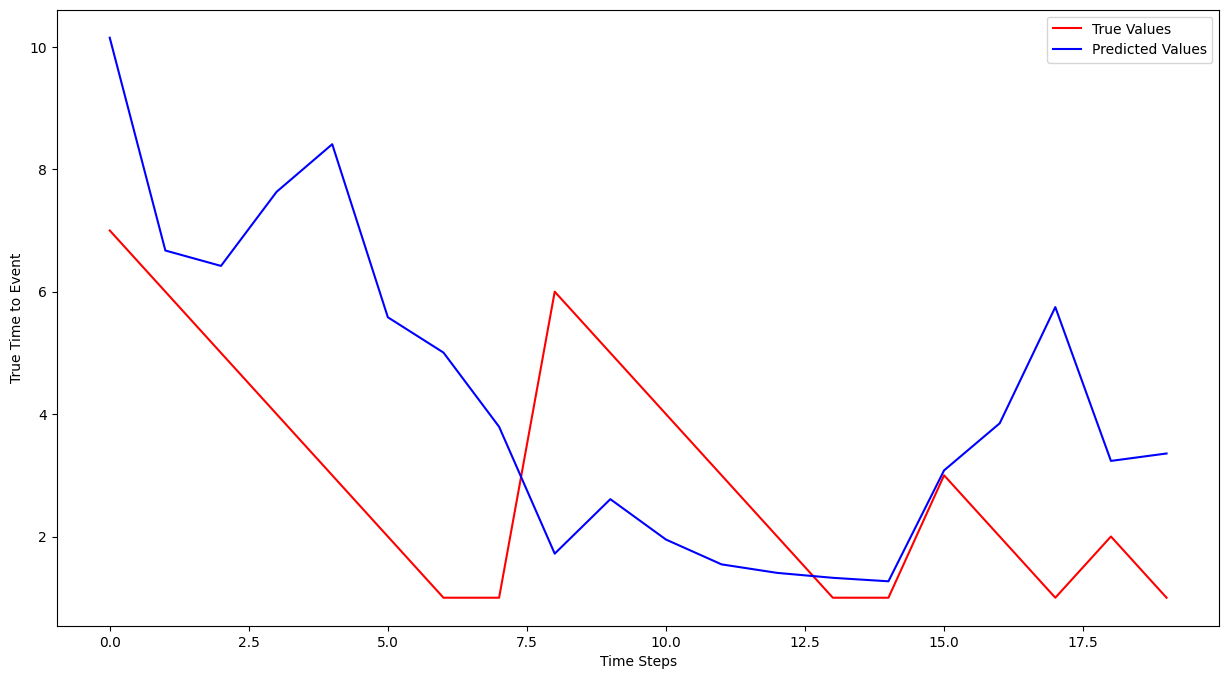

In [77]:
# Plotting test_predict against test_y
plt.figure(figsize=(15, 8))
plt.plot(y_test_rnn[0:20], color='red',label='True Values')
# plt.plot(test_predict[:10000, 0], color='yellow', label='Predicted')
plt.plot(y_pred[0:20],color='blue',label='Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('True Time to Event')
plt.legend()
plt.show()

In [70]:
X_test_rnn[0].shape

(5, 19)

In [75]:
for i in y_test_rnn[0:20]:
    print(i)

7.0
6.0
5.0
4.0
3.0
2.0
1.0
1.0
6.0
5.0
4.0
3.0
2.0
1.0
1.0
3.0
2.0
1.0
2.0
1.0


In [76]:
for i in y_pred[0:20]:
    print(i)

[10.148871]
[6.672434]
[6.420801]
[7.6314535]
[8.40903]
[5.581843]
[5.00511]
[3.7931046]
[1.7201889]
[2.6101882]
[1.9503417]
[1.5447326]
[1.4057248]
[1.3250785]
[1.2683069]
[3.0803046]
[3.8491387]
[5.7482834]
[3.2351437]
[3.3564243]


In [79]:
X_test.columns

Index(['over_start_bowler_balls_bowled', 'over_start_bowler_wickets_taken',
       'over_start_bowler_runs_given', 'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'target', 'req_run_rate', 'over_start_run_rate',
       'over_start_total_score', 'over_start_total_wickets_fallen', 'over',
       'sixers', 'fours', 'total_runs', 'match_num', 'time_to_event',
       'uncencored'],
      dtype='object')